In [1]:
!pip install labelme opencv-python matplotlib albumentations 

In [1]:
import os 
import time
import uuid
import cv2

In [4]:
uuid.uuid1()

UUID('2903771c-9558-11ef-b2fa-48e7da315aaa')

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30 

In [ ]:
for image_num in range(30):
    print(image_num)

In [19]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows() 

In [21]:
!labelme

^C


In [5]:
import tensorflow as tf
import json
import numpy as np 
from matplotlib import pyplot as plt 

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [ ]:
images.as_numpy_iterator().next()

In [15]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [57]:
images = images.map(load_image)

In [59]:
images.as_numpy_iterator().next()

array([[[ 98, 103,  73],
        [ 92,  97,  67],
        [ 98, 103,  71],
        ...,
        [180, 189, 158],
        [179, 188, 159],
        [171, 180, 151]],

       [[103, 108,  78],
        [ 98, 103,  73],
        [104, 109,  77],
        ...,
        [181, 190, 159],
        [174, 183, 154],
        [175, 184, 155]],

       [[101, 105,  78],
        [ 98, 103,  73],
        [102, 107,  75],
        ...,
        [185, 194, 163],
        [176, 185, 156],
        [176, 185, 156]],

       ...,

       [[  1,   3,   0],
        [  3,   5,   0],
        [  3,   5,   0],
        ...,
        [120, 126, 100],
        [117, 123,  97],
        [119, 125,  99]],

       [[  0,   2,   0],
        [  4,   6,   1],
        [  3,   5,   0],
        ...,
        [117, 123,  97],
        [113, 122,  93],
        [117, 126,  97]],

       [[  4,   6,   1],
        [  9,  11,   6],
        [  9,  11,   6],
        ...,
        [133, 139, 113],
        [132, 141, 112],
        [138, 147, 118]]

In [61]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [63]:
image_generator = images.batch(4).as_numpy_iterator()

In [73]:
plot_images = image_generator.next()

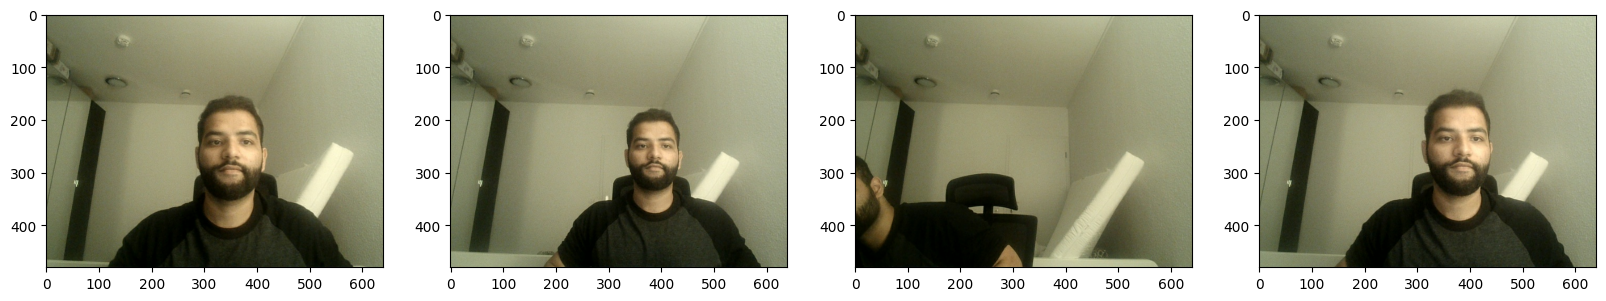

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [77]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

In [17]:
import albumentations as alb

In [19]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [21]:
img = cv2.imread(os.path.join('data','train', 'images','a79c49e9-9244-11ef-acd1-48e7da315aaa.jpg'))

In [23]:
img

array([[[ 82, 117, 113],
        [ 80, 115, 111],
        [ 81, 116, 112],
        ...,
        [172, 205, 198],
        [168, 201, 194],
        [166, 199, 192]],

       [[ 82, 117, 113],
        [ 81, 116, 112],
        [ 82, 117, 113],
        ...,
        [171, 204, 197],
        [169, 202, 195],
        [167, 200, 193]],

       [[ 81, 115, 109],
        [ 81, 115, 109],
        [ 82, 116, 110],
        ...,
        [172, 203, 196],
        [171, 204, 197],
        [168, 201, 194]],

       ...,

       [[117, 153, 147],
        [108, 144, 138],
        [111, 147, 141],
        ...,
        [103, 128, 124],
        [100, 123, 119],
        [104, 127, 123]],

       [[103, 140, 136],
        [100, 138, 132],
        [106, 144, 138],
        ...,
        [ 97, 124, 120],
        [ 98, 123, 119],
        [105, 130, 126]],

       [[122, 159, 155],
        [117, 154, 150],
        [117, 155, 149],
        ...,
        [112, 139, 135],
        [112, 137, 133],
        [122, 147, 143]]

In [25]:
with open(os.path.join('data', 'train', 'labels', 'a79c49e9-9244-11ef-acd1-48e7da315aaa.json'), 'r') as f:
    label = json.load(f)

In [27]:
label['shapes'][0]['points']

[[290.0534759358289, 190.80213903743316],
 [405.0267379679144, 360.855614973262]]

In [29]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [31]:
coords

[290.0534759358289, 190.80213903743316, 405.0267379679144, 360.855614973262]

In [33]:
coords = list(np.divide(coords, [640,480,640,480]))

In [35]:
coords

[0.45320855614973266,
 0.39750445632798576,
 0.6328542780748663,
 0.7517825311942958]

In [37]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [39]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [41]:
augmented['image'].shape

(450, 450, 3)

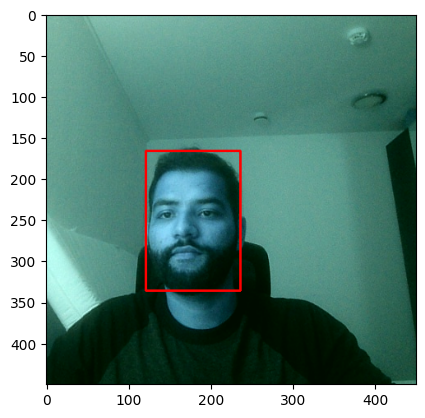

In [43]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [65]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.0001,0.0001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

#         # Skip augmentation if coordinates are not valid
#         if coords[2] <= coords[0] or coords[3] <= coords[1]:
#             print(f"Skipping augmentation for image {image} due to invalid bounding box.")
#             continue
            
            
        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [45]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [47]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [49]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [51]:
train_images.as_numpy_iterator().next()

array([[[0.7401348 , 0.7597426 , 0.6342524 ],
        [0.7430147 , 0.76262254, 0.63713235],
        [0.72046566, 0.7400735 , 0.6145833 ],
        ...,
        [0.5137868 , 0.52947307, 0.40006128],
        [0.503125  , 0.5223652 , 0.3970588 ],
        [0.52028185, 0.53498775, 0.41685048]],

       [[0.7341299 , 0.75373775, 0.62824756],
        [0.72745097, 0.7470588 , 0.6215686 ],
        [0.7334559 , 0.75306374, 0.62757355],
        ...,
        [0.5191789 , 0.53094363, 0.409375  ],
        [0.5257966 , 0.5367034 , 0.41513482],
        [0.5081495 , 0.51954657, 0.40545344]],

       [[0.7343137 , 0.74607843, 0.6245098 ],
        [0.73719364, 0.74895835, 0.6273897 ],
        [0.7333946 , 0.7451593 , 0.6235907 ],
        ...,
        [0.48572305, 0.49748775, 0.3759191 ],
        [0.51985294, 0.5237745 , 0.40220588],
        [0.51960784, 0.52843136, 0.4117647 ]],

       ...,

       [[0.28161764, 0.29552695, 0.1726103 ],
        [0.2461397 , 0.25882354, 0.1771446 ],
        [0.1338848 , 0

In [53]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [55]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [57]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [59]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [61]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.291 , 0.4128, 0.5464, 0.791 ], dtype=float16))

Combine Label and Image Samples

In [64]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [66]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [68]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [70]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [72]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2087 , 0.216  , 0.5996 , 0.8315 ],
        [0.4336 , 0.457  , 0.605  , 0.703  ],
        [0.477  , 0.3457 , 0.743  , 0.726  ],
        [0.2793 , 0.2668 , 0.486  , 0.57   ],
        [0.5596 , 0.289  , 0.766  , 0.5923 ],
        [0.4976 , 0.4158 , 0.722  , 0.739  ],
        [0.2717 , 0.394  , 0.4963 , 0.722  ],
        [0.     , 0.5215 , 0.11194, 0.891  ]], dtype=float16))

In [73]:
data_samples = train.as_numpy_iterator()

In [74]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


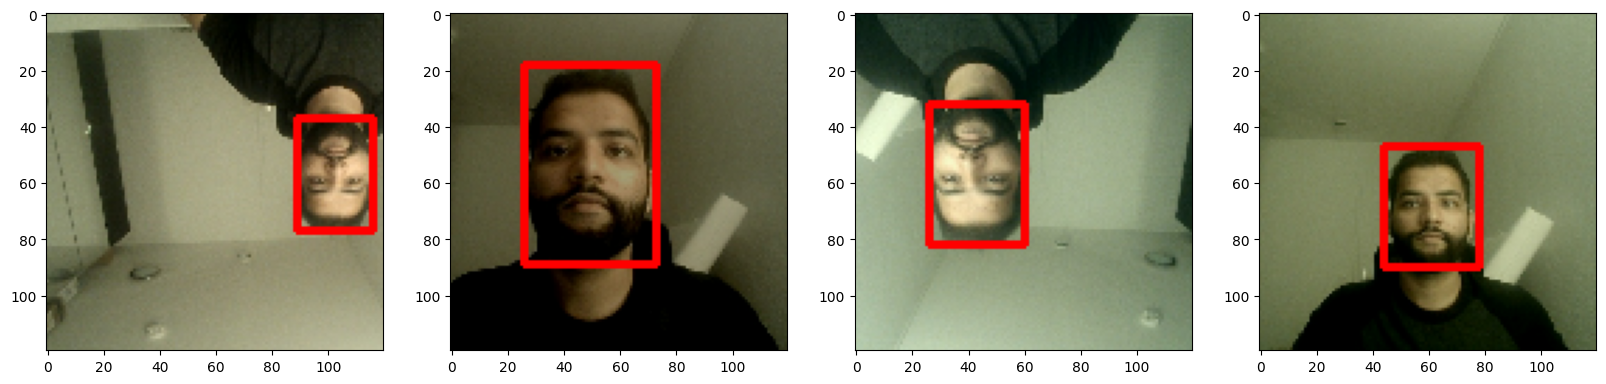

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [82]:
vgg = VGG16(include_top=False)

In [84]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [86]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [88]:
facetracker = build_model()

In [90]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [92]:
X, y = train.as_numpy_iterator().next()

In [93]:
X.shape

(8, 120, 120, 3)

In [96]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 336ms/step


In [98]:
classes, coords

(array([[0.3706007 ],
        [0.3913324 ],
        [0.39209044],
        [0.41554177],
        [0.3631585 ],
        [0.47935337],
        [0.32226875],
        [0.41550496]], dtype=float32),
 array([[0.43859047, 0.5332732 , 0.47940487, 0.3799755 ],
        [0.46486676, 0.53226244, 0.44822422, 0.3275777 ],
        [0.39800718, 0.6164759 , 0.46749288, 0.42006913],
        [0.48117056, 0.5293308 , 0.45510963, 0.38740644],
        [0.38718662, 0.6658021 , 0.47190312, 0.4843078 ],
        [0.3436642 , 0.5797546 , 0.4629352 , 0.39967528],
        [0.46019602, 0.5897321 , 0.45266798, 0.36969545],
        [0.3553528 , 0.5451853 , 0.47815007, 0.38524222]], dtype=float32))

In [100]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [102]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [104]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [106]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [108]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.718588>

In [110]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9380156>

In [112]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.718588>

In [114]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [116]:
model = FaceTracker(facetracker)

In [118]:
model.compile(opt, classloss, regressloss)

In [120]:
logdir='logs'

In [122]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 332s 695ms/step - total_loss: 0.2380 - class_loss: 0.0687 - regress_loss: 0.2036 - val_total_loss: 0.0361 - val_class_loss: 5.6017e-04 - val_regress_loss: 0.0358
Epoch 2/10
473/473 [==============================] - 335s 706ms/step - total_loss: 0.0409 - class_loss: 0.0086 - regress_loss: 0.0366 - val_total_loss: 0.3291 - val_class_loss: 0.1719 - val_regress_loss: 0.2432
Epoch 3/10
473/473 [==============================] - 348s 732ms/step - total_loss: 0.0277 - class_loss: 0.0062 - regress_loss: 0.0246 - val_total_loss: 2.4918 - val_class_loss: 2.9581 - val_regress_loss: 1.0127
Epoch 4/10
473/473 [==============================] - 332s 699ms/step - total_loss: 0.0356 - class_loss: 0.0108 - regress_loss: 0.0302 - val_total_loss: 0.0038 - val_class_loss: 4.4468e-04 - val_regress_loss: 0.0036
Epoch 5/10
473/473 [==============================] - 332s 699ms/step - total_loss: 0.0128 - class_loss: 0.0021 - regress_loss: 0.0118 - val_tot

In [132]:
hist.history

{'total_loss': [0.22970528900623322,
  0.011150466278195381,
  0.006628779228776693,
  0.007562470622360706,
  0.0029293205589056015,
  0.003155312966555357,
  0.0026318880263715982,
  0.0024622685741633177,
  0.002813538536429405,
  0.0019631299655884504],
 'class_loss': [0.14513972401618958,
  0.0011744360672309995,
  8.344713933183812e-06,
  1.1518682185851503e-05,
  0.0019012806005775928,
  0.00010786655184347183,
  0.0001290577056352049,
  8.816120680421591e-05,
  5.618225986836478e-05,
  5.091994535177946e-05],
 'regress_loss': [0.15713542699813843,
  0.010563247837126255,
  0.006624606903642416,
  0.007556711323559284,
  0.001978680258616805,
  0.0031013796105980873,
  0.002567359246313572,
  0.002418187912553549,
  0.002785447519272566,
  0.0019376700511202216],
 'val_total_loss': [0.03607577085494995,
  0.32910796999931335,
  2.4917962551116943,
  0.0038269429933279753,
  0.010898401029407978,
  0.030944589525461197,
  0.000853758305311203,
  1.8372836112976074,
  0.0068197343

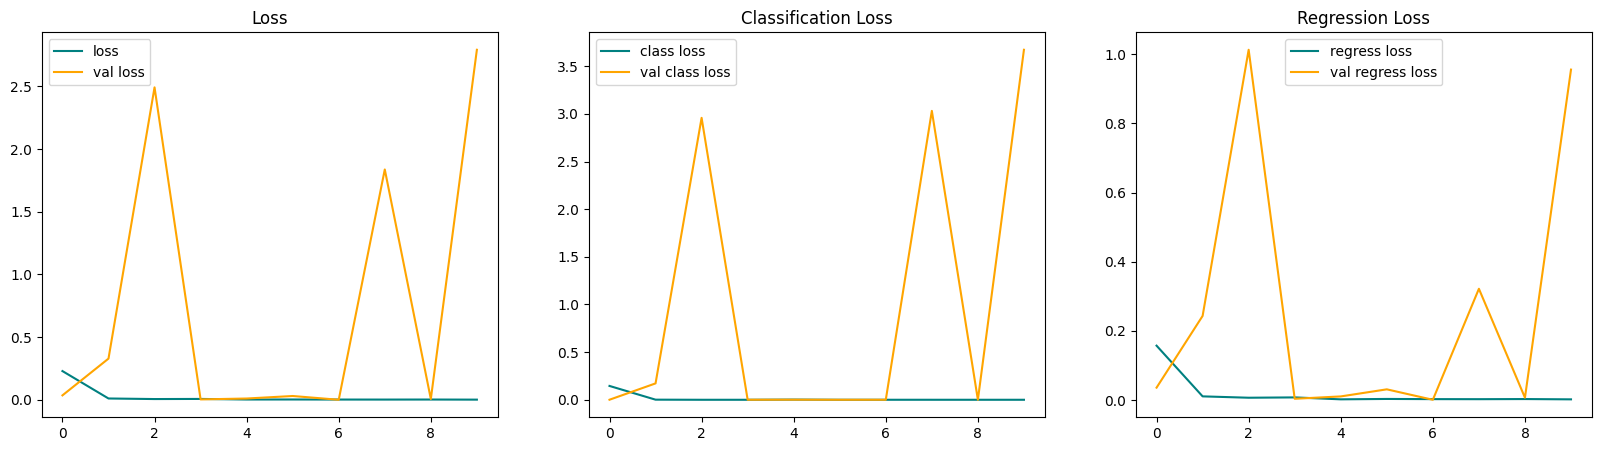

In [134]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [136]:
test_data = test.as_numpy_iterator()

In [138]:
test_sample = test_data.next()

In [139]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 198ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


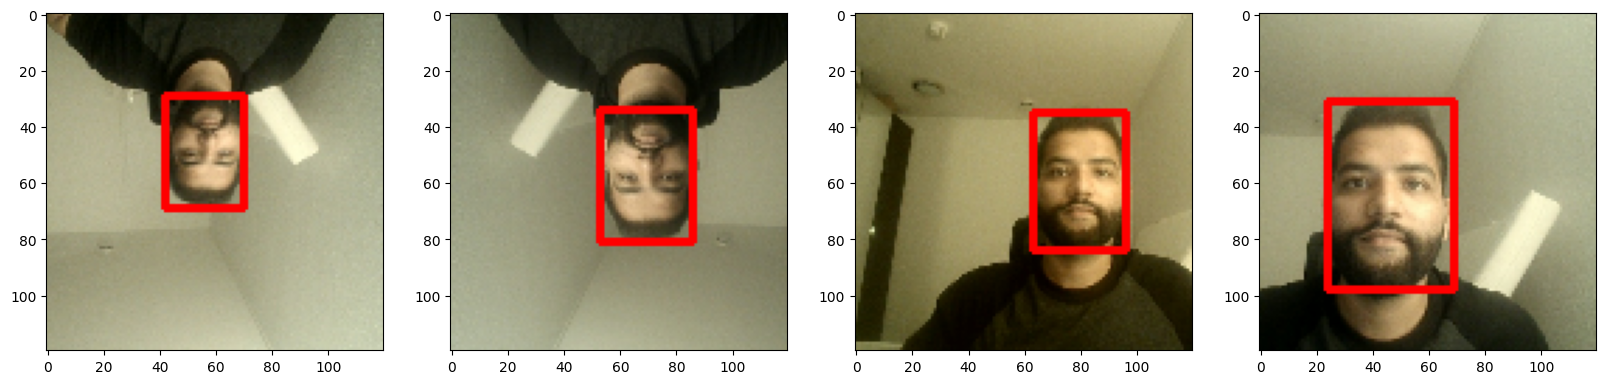

In [144]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [146]:
from tensorflow.keras.models import load_model

In [148]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()